# autograd

In [7]:
import torch
import matplotlib.pyplot as plt

## 声明梯度

当创建一个tensor时，将 `requires_grad` 参数设为 `True` ，PyTorch会自动为这个tensor创建计算图，便于后续反向传播计算梯度。下面我们使用autograd来训练一个two-layer net，损失函数为softmax。

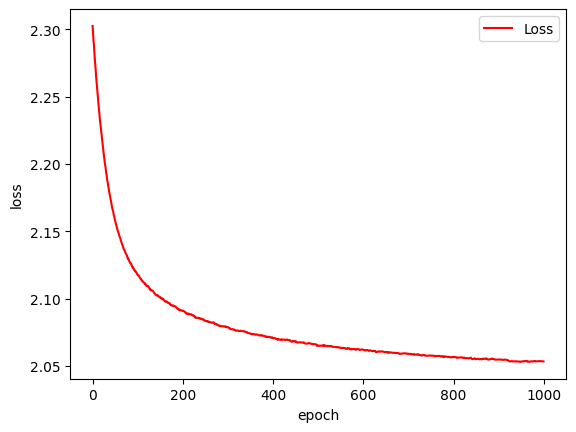

In [8]:
# 分别表示样本数、样本的维度、隐藏维度大小、最终分类数
N, D, H, C = 32, 100, 200, 10

# 随机生成训练样本
X = torch.randn(N, D) 
y = torch.randint(0, C, (N,))

# 初始化参数并声明梯度
W1 = torch.ones(D, H, requires_grad=True)
W2 = torch.ones(H, C, requires_grad=True)
b1 = torch.ones(H, requires_grad=True)
b2 = torch.ones(C, requires_grad=True)

# 设置超参数
learning_rate = 1e-5
epochs = 1000

loss_history = []

for epoch in range(epochs):
    hidden_layer = X @ W1 + b1
    hidden_layer[hidden_layer < 0] = 0 # ReLU
    
    scores = hidden_layer @ W2 + b2
    scores -= scores.max(dim=1).values.view(-1, 1)
    
    softmax_scores = scores.exp() / scores.exp().sum(dim=1).view(-1, 1)
    correct_softmax_scores = softmax_scores[range(N), y]
    
    loss = (-1 * correct_softmax_scores.log()).mean()
    """
    使用 `backward` 方法可以得到所有声明了需要梯度变量的梯度，
    并且会清除计算图中的计算
    """
    loss.backward()
    loss_history.append(loss.item())
    
    """
    由于更新参数这一步并不需要计入计算图中，
    所以使用 `with torch.no_grad():` 暂时关闭梯度计算功能，
    不将这一步计算入梯度的计算中
    
    另外，使用梯度后需要手动进行清零，否则梯度会一直累加，
    使用 `grad.zero_` 方法进行梯度清零
    """
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        W2 -= learning_rate * W2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
        W1.grad.zero_()
        W2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

plt.figure()
plt.plot(range(epochs), loss_history, color="red", label='Loss')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()